# Nonnegative Matrix Factorization (NMF)

Nonnegative Matrix Factorization (NMF) is a technique for decomposing a nonnegative matrix $( X )$ into two nonnegative matrices $( W )$ and $( H )$, such that:
$[
X \approx WH
]$
where:
- $( X )$ is the original data matrix, with dimensions $( m \times n )$,
- $( W )$ is a nonnegative matrix of dimensions $( m \times k )$, representing basis vectors, and
- $( H )$ is a nonnegative matrix of dimensions $( k \times n )$, representing coefficients.

NMF is widely used in applications like text mining, image processing, and audio source separation due to its ability to produce interpretable, parts-based representations.

### Multiplicative Update (MU) Algorithm

The **Multiplicative Update (MU)** algorithm iteratively updates $( W )$ and $( H )$ by minimizing the reconstruction error:
$[
\min_{W, H} || X - WH ||_F^2
]$
subject to $( W \geq 0 )$ and $( H \geq 0 )$. Here, $( || \cdot ||_F )$ denotes the Frobenius norm.

#### Update Equations

The MU algorithm applies the following element-wise update rules for $( W )$ and $( H )$:

1. **Update for $( H )$**:
   $[
   H \leftarrow H \circ \frac{W^T X}{W^T WH}
   ]$

2. **Update for $( W )$**:
   $[
   W \leftarrow W \circ \frac{X H^T}{W H H^T}
   ]$
   
where $( \circ )$ denotes element-wise multiplication, and division is also element-wise.



In [12]:
import numpy as np

# Function to perform NMF using the Multiplicative Update (MU) algorithm
def nmf_multiplicative_update(X, rank, max_iter=10000, tol=1e-6):
    """
    Performs Nonnegative Matrix Factorization using the Multiplicative Update algorithm.
    
    Parameters:
        X (numpy array): The data matrix of shape (m, n).
        rank (int): The number of components (k).
        max_iter (int): The maximum number of iterations.
        tol (float): The tolerance for convergence.
    
    Returns:
        W (numpy array): The basis matrix of shape (m, k).
        H (numpy array): The coefficient matrix of shape (k, n).
    """
    # ToDo: Initialize W and H with random nonnegative values
    m, n = X.shape
    W = np.random.rand(m, rank)
    H = np.random.rand(rank, n)

    prev_error = 1e10
    # ToDo: Iteratively update W and H
    for i in range(max_iter):
        # Update H
        H = H * (W.T @ X)/(W.T @ W @ H)
        
        # Update W
        W = W * (X @ H.T)/(W @ H @ H.T)
        
        # Check convergence based on reconstruction error
        if i % 50 == 0:  # Print every 10 iterations
            reconstruction = W @ H
            error = np.linalg.norm(X - reconstruction, 'fro')
            print(f"Iteration {i}: Reconstruction error = {error:.4f}")
            if (prev_error-error) < tol:
                print("Converged.")
                break
            prev_error = error
    
    return W, H

# Example usage
X = np.random.rand(10, 8)  # Example random matrix for testing
W, H = nmf_multiplicative_update(X, rank=7)

Iteration 0: Reconstruction error = 2.5736
Iteration 50: Reconstruction error = 0.6335
Iteration 100: Reconstruction error = 0.4563
Iteration 150: Reconstruction error = 0.4294
Iteration 200: Reconstruction error = 0.3960
Iteration 250: Reconstruction error = 0.3814
Iteration 300: Reconstruction error = 0.3746
Iteration 350: Reconstruction error = 0.3700
Iteration 400: Reconstruction error = 0.3670
Iteration 450: Reconstruction error = 0.3656
Iteration 500: Reconstruction error = 0.3650
Iteration 550: Reconstruction error = 0.3647
Iteration 600: Reconstruction error = 0.3646
Iteration 650: Reconstruction error = 0.3645
Iteration 700: Reconstruction error = 0.3644
Iteration 750: Reconstruction error = 0.3643
Iteration 800: Reconstruction error = 0.3642
Iteration 850: Reconstruction error = 0.3642
Iteration 900: Reconstruction error = 0.3641
Iteration 950: Reconstruction error = 0.3640
Iteration 1000: Reconstruction error = 0.3639
Iteration 1050: Reconstruction error = 0.3638
Iteration 1

IndexError: index 6 is out of bounds for axis 0 with size 6

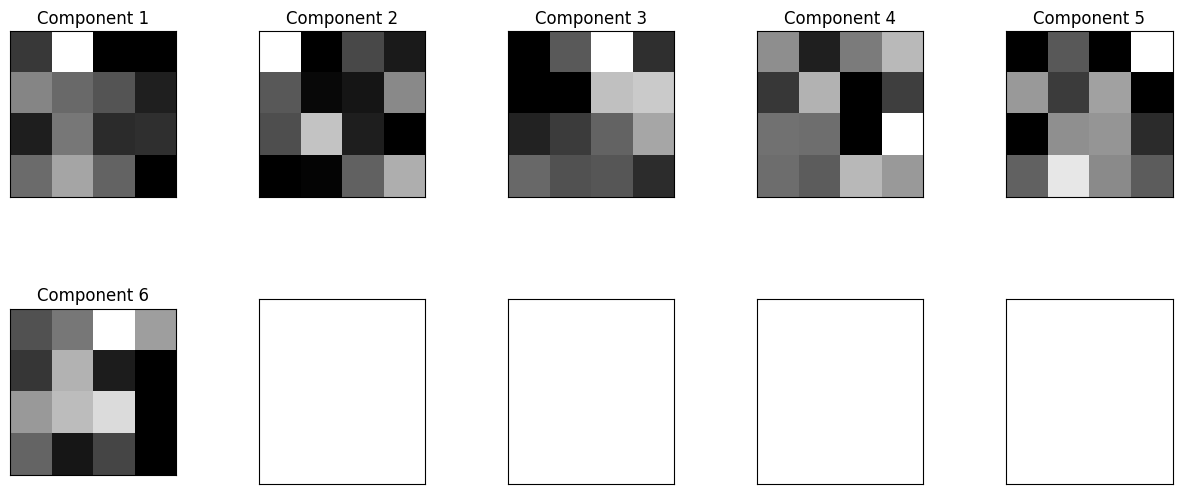

In [9]:
import matplotlib.pyplot as plt
# Visualize the learned components (features)
fig, axes = plt.subplots(2, 5, figsize=(15, 6),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.5, wspace=0.5))

for i, ax in enumerate(axes.flat):
    ax.imshow(H[i].reshape(4, 4), cmap='gray')
    ax.set_title(f'Component {i+1}')

plt.suptitle("First 10 NMF Components (Features) Representing Facial Parts")
plt.show()

# Visualize a reconstructed image using the features
sample_index = 0  # Choose a face image index to reconstruct
reconstructed_face = W[sample_index] @ H  # Reconstruct the face

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X[sample_index].reshape(4, 4), cmap='gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_face.reshape(4, 4), cmap='gray')
plt.title("Reconstructed Image")
plt.show()

# Application of NMF on the Faces Dataset

NMF can be effectively used for **feature extraction** in images. When applied to a set of facial images, each component in the matrix $( W )$ often corresponds to distinct facial features, such as eyes, nose, and mouth. Each image can be represented as a combination of these features, encoded in the matrix $( H )$.

In this section, we’ll apply NMF to the **Faces dataset**. By factorizing the dataset, we aim to decompose each face image into a combination of fundamental features learned by the model. This decomposition demonstrates the interpretability of NMF, as each feature often corresponds to a part-based component of the face.

### Task

1. Load the Faces dataset and preprocess it by reshaping the images into vectors.
2. Use an existing NMF algorithm from `sklearn.decomposition` to decompose the dataset.
3. Visualize some of the learned components from $( W )$, which correspond to facial features.

Let’s see how well NMF can capture the main features in the face images!


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/luzinsan/scikit_learn_data


/home/luzinsan/.cache/pypoetry/virtualenvs/ml-venv-uqlfkjfM-py3.11/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


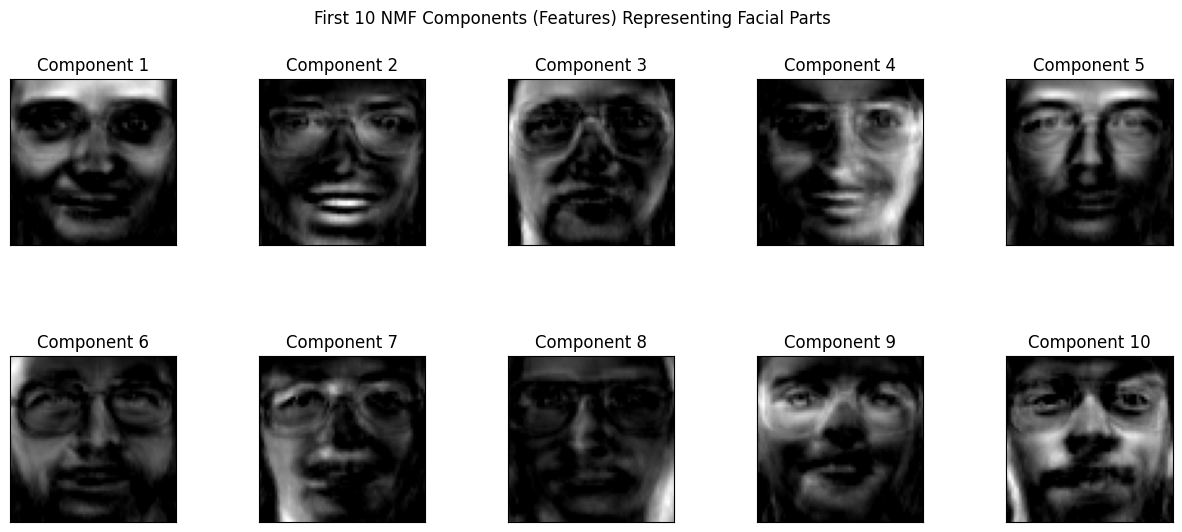

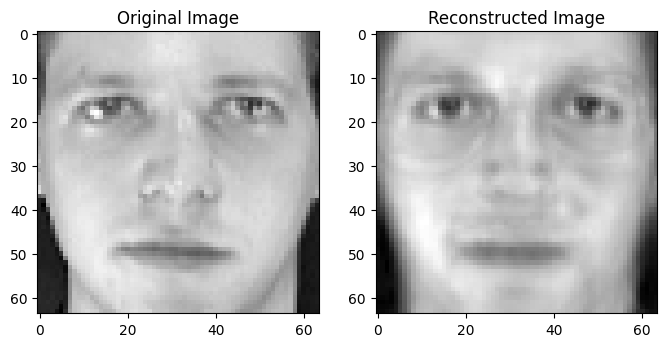

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_olivetti_faces, fetch_lfw_people

# Load the Faces dataset
faces = fetch_olivetti_faces()
X_faces = faces.data  # Shape (400, 64*64), each row is a flattened 64x64 face image

# Apply NMF with a set number of components (e.g., k = 20)
n_components = 50
model = NMF(n_components=n_components, init='random', max_iter=1000, random_state=42)
W = model.fit_transform(X_faces)
H = model.components_

# Visualize the learned components (features)
fig, axes = plt.subplots(2, 5, figsize=(15, 6),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.5, wspace=0.5))

for i, ax in enumerate(axes.flat):
    ax.imshow(H[i].reshape(64, 64), cmap='gray')
    ax.set_title(f'Component {i+1}')

plt.suptitle("First 10 NMF Components (Features) Representing Facial Parts")
plt.show()

# Visualize a reconstructed image using the features
sample_index = 0  # Choose a face image index to reconstruct
reconstructed_face = W[sample_index] @ H  # Reconstruct the face

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_faces[sample_index].reshape(64, 64), cmap='gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_face.reshape(64, 64), cmap='gray')
plt.title("Reconstructed Image")
plt.show()


In [ ]:
ToDo: Now apply your function on the dataset and plot